In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100

In [2]:
path = '../datasets_full/London_more/'
employ_by_industry = pd.read_excel(open(path + 'employment-rate-by-industry.xlsx', 'rb'), 
                                   sheet_name='Employ Industry Percent', header=[0, 1], index_col=0) 

In [3]:
boroughs = ['Barking and Dagenham', 'Barnet', 'Bexley', 'Brent', 'Bromley',
            'Camden', 'Croydon', 'Ealing', 'Enfield', 'Greenwich', 'Hackney',
            'Hammersmith and Fulham', 'Haringey', 'Harrow', 'Havering',
            'Hillingdon', 'Hounslow', 'Islington', 'Kensington and Chelsea',
            'Kingston upon Thames', 'Lambeth', 'Lewisham', 'Merton', 'Newham',
            'Redbridge', 'Richmond upon Thames', 'Southwark', 'Sutton',
            'Tower Hamlets', 'Waltham Forest', 'Wandsworth', 'Westminster'] # 32 boroughs
regions = ['North East', 'North West', 'Yorkshire and The Humber',
           'East Midlands', 'West Midlands', 'East', 'South East',
           'South West', 'London'] # 9 regions
countries = ['England', 'Wales', 'Scotland', 'Northern Ireland']  # 4 countries

In [4]:
employ_by_industry.columns = employ_by_industry.columns.swaplevel(0, 1)

In [5]:
employ_by_industry

Region,London,UK,London,UK,London,UK,London,UK,London,UK,London,UK,London,UK,London,UK,London,UK,London,UK
Industry,A:agriculture and fishing,A:agriculture and fishing (SIC 2007),"B,D,E:energy and water","B,D,E:energy and water (SIC 2007)",C:manufacturing,C:manufacturing (SIC 2007),F:construction,F:construction (SIC 2007),"G,I:distribution, hotels and restaurants","G,I:distribution, hotels and restaurants (SIC 2007)","H,J:transport and communications","H,J:transport and communications (SIC 2007)","K-N:banking, finance and insurance","K-N:banking, finance and insurance (SIC 2007)",O-Q:public admin. education and health,O-Q:public admin. education and health (SIC 2007),R-U:other services,R-U:other services (SIC 2007),G-Q:total services,G-Q:total services (SIC 2007)
Jan 2004-Dec 2004,0.1,1.0,0.8,1.4,5.6,13.1,7.3,8.4,17.8,19.2,13.9,9.6,22.0,14.0,25.2,27.6,6.7,5.2,85.6,75.5
Jan 2005-Dec 2005,0.1,1.0,0.7,1.4,5.3,12.5,7.4,8.5,17.0,19.0,13.0,9.4,22.8,14.2,26.3,28.2,6.6,5.2,85.7,76.0
Jan 2006-Dec 2006,0.1,1.0,0.8,1.5,5.5,12.2,7.6,8.7,16.3,18.8,12.7,9.4,22.2,14.1,27.2,28.4,6.7,5.3,85.1,76.0
Jan 2007-Dec 2007,0.2,1.0,1.1,1.6,6.3,12.1,7.5,8.7,15.9,18.6,12.5,9.4,23.8,14.7,25.5,28.1,6.4,5.3,84.1,76.0
Jan 2008-Dec 2008,0.2,1.1,1.1,1.7,5.6,11.4,7.2,8.8,16.4,18.7,12.5,9.4,23.9,14.5,25.3,28.5,7.0,5.3,85.0,76.4
Jan 2009-Dec 2009,0.1,1.1,0.8,1.7,3.9,9.8,7.1,8.0,16.1,18.5,12.0,8.6,24.8,16.0,27.5,30.0,7.0,5.6,87.3,78.7
Jan 2010-Dec 2010,0.1,1.2,0.6,1.6,3.7,9.9,6.6,7.5,17.2,18.5,11.4,8.4,24.6,15.9,27.7,30.6,7.1,5.5,88.0,79.0
Jan 2011-Dec 2011,0.0,1.2,1.0,1.8,3.8,9.8,7.0,7.4,16.7,18.7,11.4,8.6,24.7,16.0,27.8,30.2,7.0,5.6,87.5,79.2
Jan 2012-Dec 2012,0.0,1.2,0.8,1.7,3.5,9.8,6.8,7.1,16.1,18.5,12.1,8.8,26.0,16.2,26.8,30.2,6.7,5.5,87.7,79.2


In [6]:
employ_by_industry.index = np.array([s.split(' ')[2] for s in employ_by_industry.index]).astype(str)

In [7]:
df_london = employ_by_industry['London']
df_london.columns = [s.split(':')[1].capitalize() for s in df_london.columns]
df_london = df_london[df_london.columns[~df_london.columns.isin(['Agriculture and fishing', 'Total services'])]]
df_london.index = df_london.index.astype(int)

In [8]:
df_UK = employ_by_industry['UK']
df_UK.columns = [s.split(':')[1].capitalize().split(' (')[0] for s in df_UK.columns]
df_UK = df_UK[df_UK.columns[~df_UK.columns.isin(['Agriculture and fishing', 'Total services'])]]

In [9]:
IO = ['Construction', 
      'Distribution, hotels and restaurants', 
      'Transport and communications']
df_london_IO = df_london.copy()
df_london_IO['Others'] = df_london_IO.loc[:, ~df_london_IO.columns.isin(IO)].sum(axis=1)

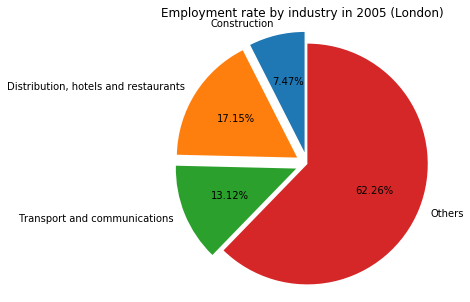

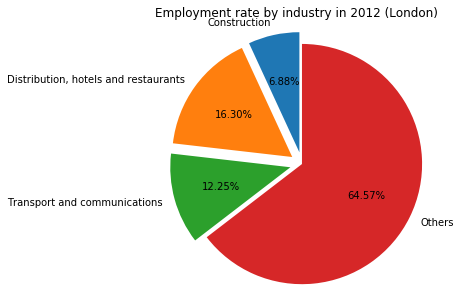

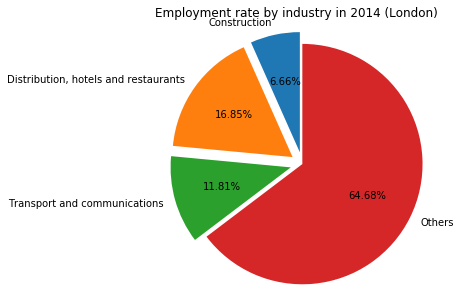

In [10]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
for year in [2005, 2012, 2014]:
    df_plot = df_london_IO.loc[df_london_IO.index==year, [*IO, 'Others']]
    labels = df_plot.columns
    london_perct = np.array(*df_plot.values)
    # UK_perct = df_UK.loc[df_UK.index==year, :] * 100
    fig, ax = plt.subplots(figsize=(5, 5))
    explode = [(s in ['Construction', 'Distribution, hotels and restaurants', 
                      'Transport and communications'])*0.1 for s in labels]
    ax.pie(london_perct, explode=explode, labels=labels, autopct='%1.2f%%', startangle=90)
    #pctdistance=0.9, radius=1.2)
    # wedges, texts, autotexts = axes[1].pie(UK_perct, labels=None, autopct='%1.2f%%', pctdistance=0.9, radius=1.2)
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    ax.set_title('Employment rate by industry in {} (London)'.format(year), fontsize=12)
    # ax.set_title('Employment rate by industry in {} (UK)'.format(year))
#     ax.legend(wedges, london_perct, title="Industries", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
    plt.show()

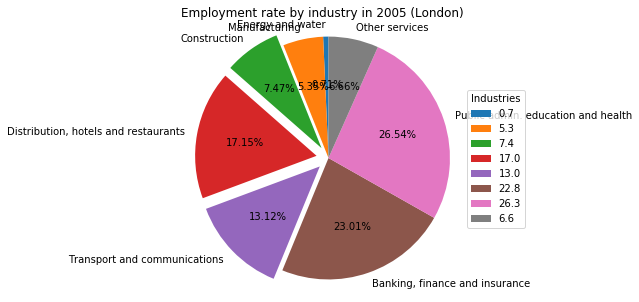

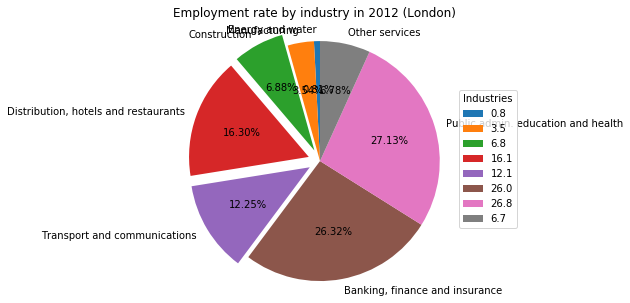

In [11]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = df_london.columns
for year in [2005, 2012]:
    df_plot = df_london.loc[df_london.index==year, :]
    london_perct = np.array(*df_plot.values)
    # UK_perct = df_UK.loc[df_UK.index==year, :] * 100
    fig, ax = plt.subplots(figsize=(5, 5))
    explode = [(s in ['Construction', 'Distribution, hotels and restaurants', 
                      'Transport and communications'])*0.1 for s in labels]
    wedges, texts, autotexts = ax.pie(london_perct, explode=explode, labels=labels,autopct='%1.2f%%', startangle=90)
                                      #pctdistance=0.9, radius=1.2)
    #     wedges, texts, autotexts = axes[1].pie(UK_perct, labels=None, autopct='%1.2f%%', pctdistance=0.9, radius=1.2)
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    ax.set_title('Employment rate by industry in {} (London)'.format(year))
    #     ax.set_title('Employment rate by industry in {} (UK)'.format(year))
    ax.legend(wedges, london_perct, title="Industries", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
    plt.show()

/Users/ruiyan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.


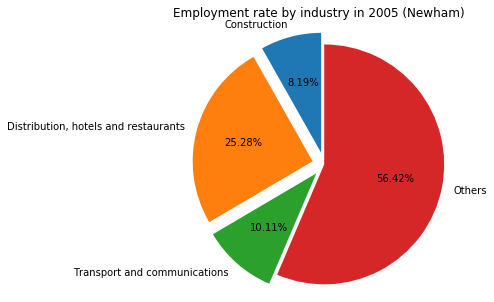

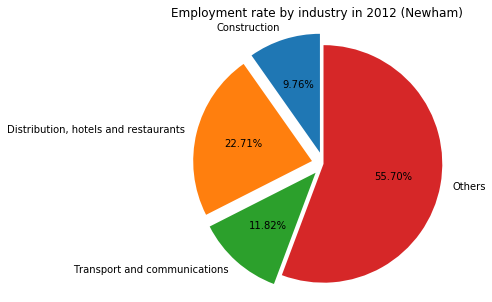

In [12]:
df_sets = {}

for year in [2005, 2012]:
    df = pd.read_excel(open(path + 'employment-rate-by-industry.xlsx', 'rb'), 
                       sheet_name=str(year), header=[0, 1], index_col=0)
    df.columns = df.columns.swaplevel(0, 1)
    df_percent = df.loc[:, ['Area','percent']]
    df_percent = df_percent.set_index('Area')['percent']
    df_percent.columns = [s.split(':')[1].capitalize() for s in df_percent.columns]

    IO = ['Construction', 'Distribution, hotels and restaurants', 'Transport and communications']
    df_IO = df_percent.copy()
    df_IO = df_IO.replace('!', np.nan)
    df_IO = df_IO[df_IO.columns[~df_IO.columns.isin(['Agriculture and fishing', 'Total services'])]]    
    df_IO['Others'] = df_IO.loc[:, ~df_IO.columns.isin(IO)].sum(axis=1)
    
    df_IO.index = [s[0] for s in df_IO.index]
    df_plot = df_IO.loc[:, [*IO, 'Others']]

    fig, ax = plt.subplots(figsize=(5, 5))
    explode = [(s in IO)*0.1 for s in df_plot.columns]
    ax.pie(df_plot.loc[df_plot.index=='Newham', :], explode=explode, labels=df_plot.columns, 
           autopct='%1.2f%%', startangle=90)
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    ax.set_title('Employment rate by industry in {} (Newham)'.format(year), fontsize=12)
#     ax.legend(wedges, london_perct, title="Industries", 
#               loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
    plt.show()
# #     df_sets[year] = df